# INE 9104- Spring 2025
### Homework 4
### due Wednesday Apr/09

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

 # 1.
 Develop an acceptance-rejection technique for generating a geometric random variable X.

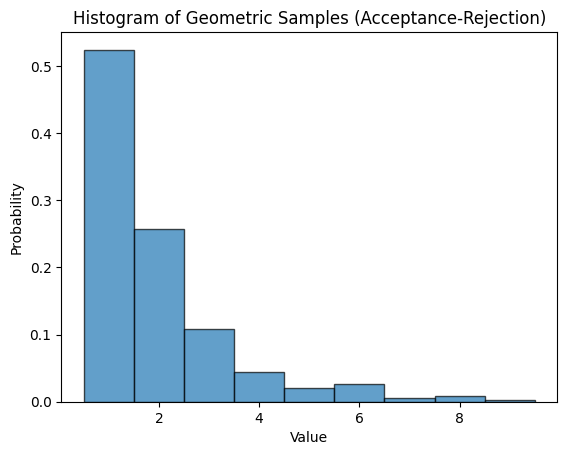

In [2]:
def sample_geometric_ar(p0=0.5, size=1000):
    samples = []
    c = p0 + 0.1
    while len(samples) < size:
        # Proposal: sample Y ~ Geometric(p0)
        U1 = np.random.uniform()
        Y = int(np.log(U1 / (-np.log(1 - p0))) / np.log(1 - p0))

        # Uniform random variable for acceptance
        U2 = np.random.uniform()

        # Acceptance probability
        acceptance_prob = p0 / c

        if U2 <= acceptance_prob:
            samples.append(Y)
    return np.array(samples)


# Example usage
samples = sample_geometric_ar(p0=0.5, size=1000)

plt.hist(samples, bins=np.arange(1, max(samples) + 2) - 0.5, density=True, alpha=0.7, edgecolor='black')
plt.title('Histogram of Geometric Samples (Acceptance-Rejection)')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.show()

# 2.
Develop an acceptance-rejection technique for generating a random variable from a distribution
 with pdf f(x) = 3x2, 0 ≤ x ≤ 1.

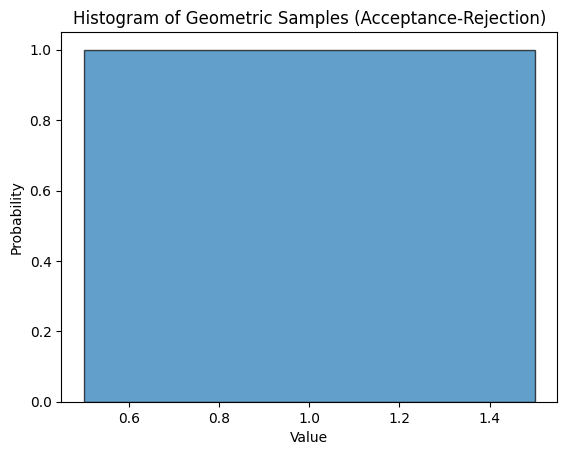

In [3]:
# 2. Acceptance-Rejection for f(x) = 3x^2
def sample_fx(size=1000):
    samples = []
    while len(samples) < size:
        Y = np.random.uniform(0, 1)
        U2 = np.random.uniform(0, 1)

        acceptance_prob = Y ** 2

        if U2 <= acceptance_prob:  # accept with probability proportional to x^2
            samples.append(Y)
    return np.array(samples)


# Example usage
samples = sample_fx()

plt.hist(samples, bins=np.arange(1, max(samples) + 2) - 0.5, density=True, alpha=0.7, edgecolor='black')
plt.title('Histogram of Geometric Samples (Acceptance-Rejection)')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.show()

# 3.
Generate 1000 pairs of i.i.d.
Unif(0,1)s, (U1,1,U2,1),(U1,2,U2,2),...,(U1,1000,U2,1000).


For i = 1, 2,...,1000,
set

Xi =  −2ln(U1,i)cos(2πU2,i),

Yi =  −2ln(U1,i)sin(2πU2,i).

(a) Make a histogram of the Xi’s. Comments?

(b) Graph Xi Vs. Yi. Comment?

(c) Make a histogram of Xi/Yi. Comments?

(d) Make a histogram of X2i +Y2i . Comments?

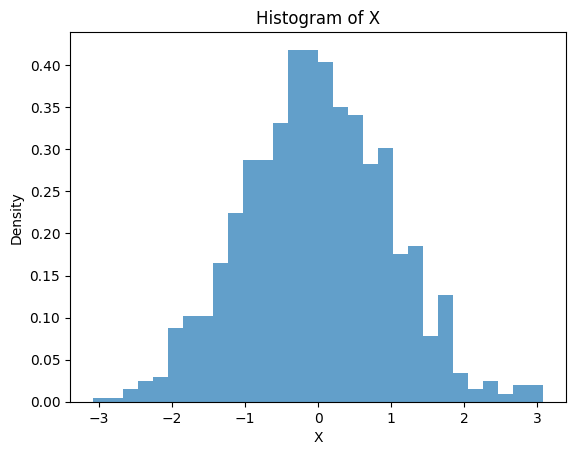

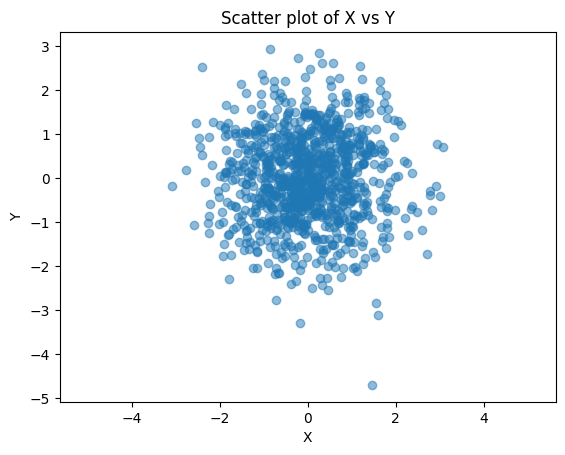

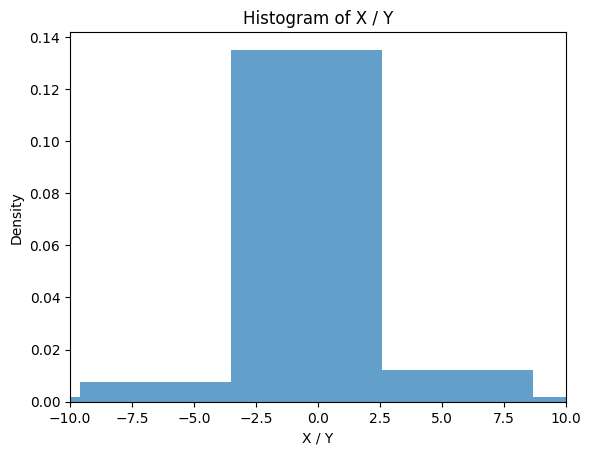

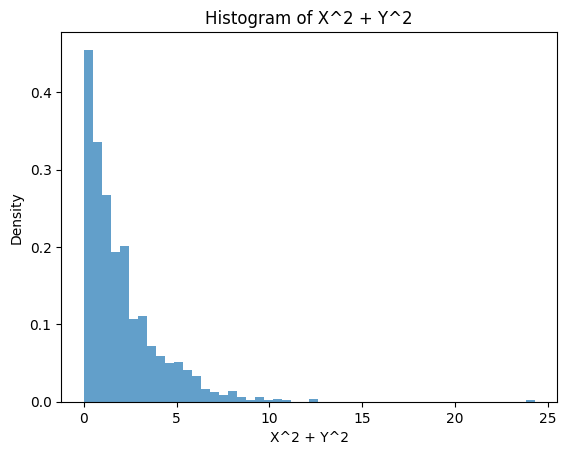

In [4]:
# 3. Generate (Xi, Yi) using Box-Muller
def generate_box_muller(n=1000):
    U1 = np.random.uniform(size=n)
    U2 = np.random.uniform(size=n)
    X = np.sqrt(-2 * np.log(U1)) * np.cos(2 * np.pi * U2)
    Y = np.sqrt(-2 * np.log(U1)) * np.sin(2 * np.pi * U2)
    return X, Y


# Plotting for 3
X, Y = generate_box_muller()

# (a) Histogram of X
plt.hist(X, bins=30, density=True, alpha=0.7)
plt.title('Histogram of X')
plt.xlabel('X')
plt.ylabel('Density')
plt.show()

# (b) Scatter plot X vs Y
plt.scatter(X, Y, alpha=0.5)
plt.title('Scatter plot of X vs Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.show()

# (c) Histogram of X/Y
ratio = X / Y
plt.hist(ratio, bins=50, density=True, alpha=0.7)
plt.title('Histogram of X / Y')
plt.xlabel('X / Y')
plt.ylabel('Density')
plt.xlim(-10, 10)  # limit to see main shape
plt.show()

# (d) Histogram of X^2 + Y^2
r_squared = X ** 2 + Y ** 2
plt.hist(r_squared, bins=50, density=True, alpha=0.7)
plt.title('Histogram of X^2 + Y^2')
plt.xlabel('X^2 + Y^2')
plt.ylabel('Density')
plt.show()

# 4.
A machine is taken out of production either if it fails or after 5 hours,
 whichever comes first. By running similar machines until failure, it has
 been found that time to failure X has the Weibull distribution with
 the cdf F(x) = 1−e(x/α)β where α = 8 and β = 0.75 (thelocation parameter is set
 to ν = 0). The time until the machine is taken out of production can
 be represented as Y. Develop a step-by-step procedure for generating Y
 with the inverse transform method and generate 10 values of Y (You may use MAT
LAB or EXCEL).

In [5]:
# 4. Load Quantile.xlsx and process
quantile_data = pd.read_excel('./Quantile.xlsx')

# (1) CI for first 20
p = 20
first_20 = quantile_data.iloc[:p, 0]
mean_20 = np.mean(first_20)
std_20 = np.std(first_20, ddof=1)
ci_halfwidth_20 = stats.t.ppf(0.975, df=p - 1) * std_20 / np.sqrt(p)

print("4-1")
print(f"First 20 mean: {mean_20:.4f}")
print(f"First 20 CI half-width: {ci_halfwidth_20:.4f}\n")

# (2) Two-stage sampling
n = int(std_20 ** 2 * (stats.t.ppf(0.975, df=p - 1) ** 2) / 0.25)
n_data = quantile_data.iloc[p:p + n, 0]
mean_n = np.mean(n_data)
std_n = np.std(n_data, ddof=1)
ci_halfwidth_n = stats.t.ppf(0.975, df=n - 1) * std_n / np.sqrt(n)

print("4-2")
print(f"total num: {n}")
print(f"n data mean: {mean_n:.4f}")
print(f"n CI half-width: {ci_halfwidth_n:.4f}\n")


# (3) Sequential sampling
def sequential_sampling(data, target_halfwidth=0.5):
    means = []
    ci_widths = []
    i = 1
    check = 0
    while check == 0:

        sample = data.iloc[:i, 0]
        mean = np.mean(sample)
        std = np.std(sample, ddof=1)
        halfwidth = stats.t.ppf(0.975, df=i - 1) * std / np.sqrt(i)
        means.append(mean)
        ci_widths.append(halfwidth)
        if (halfwidth < target_halfwidth) & (i >= 20):
            check = 1
            print(f"Reached target half-width with {i} samples.")
        else:
            i += 1

    return i, mean, halfwidth


print("4-2")
n, mean, ci_halfwidth = sequential_sampling(quantile_data)

print(f"total num: {n}")
print(f"n data mean: {mean:.4f}")
print(f"n CI half-width: {ci_halfwidth:.4f}\n")

4-1
First 20 mean: 2.8554
First 20 CI half-width: 1.4650

4-2
total num: 171
n data mean: 2.6182
n CI half-width: 0.3200

4-2
Reached target half-width with 83 samples.
total num: 83
n data mean: 2.5528
n CI half-width: 0.4986

